## 🏡📈 Analyse Approfondie des Prix Immobiliers : Défis et Solutions en Régression

#### LEPERCQ Louise, NITA Carmen Andreea, SARR Adja, THIOUNE Magatte Niang - M2 SIAD Projet BI / Big Data

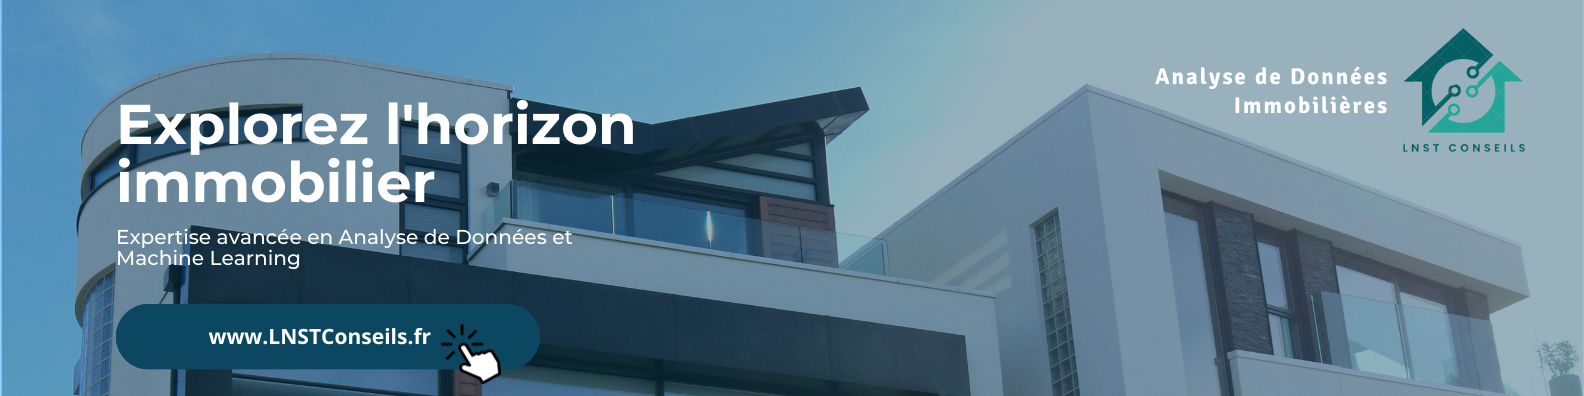

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Compétition Kaggle </strong>

House Prices - Advanced Regression Techniques : Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

</div>

### Etape 6 - Corrélation entre les variables

1. [Introduction](#introduction)
1. [Corrélation entre les variables](#correl)
  1. [Suppression de variables](#suppression)
  1. [Procédure ANOVA](#ANOVA)
  1. [Matrice de corrélation](#corrélation)

# Partie 1 - Introduction <a class="anchor"  id="introduction"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">

- Depuis plusieurs années, le marché de l’immobilier fluctue. Plusieurs facteurs entrent en jeu, chacun contribuant à l'évolution complexe du **marché immobilier**. Lorsque l’économie progresse, la demande de logements augmente généralement, ce qui peut impacter positivement les prix des logements. Et inversement, une baisse de l'économie peut provoquer une baisse des prix des logements. De plus, un autre facteur qui peut impacter les prix des logements est la localisation des logements. Les prix des logements en métropole seront plus élevés que les prix des logements se situant en pleine campagne. Puis, les caractéristiques du logement seront aussi déterminants pour le prix du logement.

- Aujourd’hui notre entreprise **LNST Conseils** a été missionnée de réaliser une **analyse prédictive des prix des logements**. Pour cela, nous avons un disposition un fichier dans lequel nous pouvons retrouver des caractéristiques du logement, ainsi que des informations sur la localisation du logement. Ce fichier va nous servir à tester différents modèles de prédiction et une fois affiner, le modèle sera capable de prédire le prix des logements selon leurs caractéristiques.

- Ce projet est ancré au sein de la **compétition Kaggle "House Prices - Advanced Regression Techniques"**. L'objectif fondamental qui sous-tend cette initiative est d'exploiter des approches avancées en matière de régression, notamment le *feature engineering* et la construction des modèles de prédiction des prix immobiliers d'une grande robustesse.

- L'**objectif** ultime est de développer un modèle qui puisse offrir des prédictions fiables et précises sur les prix immobiliers. Cette compétition Kaggle offre une opportunité exceptionnelle d'explorer et de mettre en œuvre des techniques de pointe en matière d'apprentissage automatique pour résoudre un défi concret dans le domaine de l'immobilier.

</div>

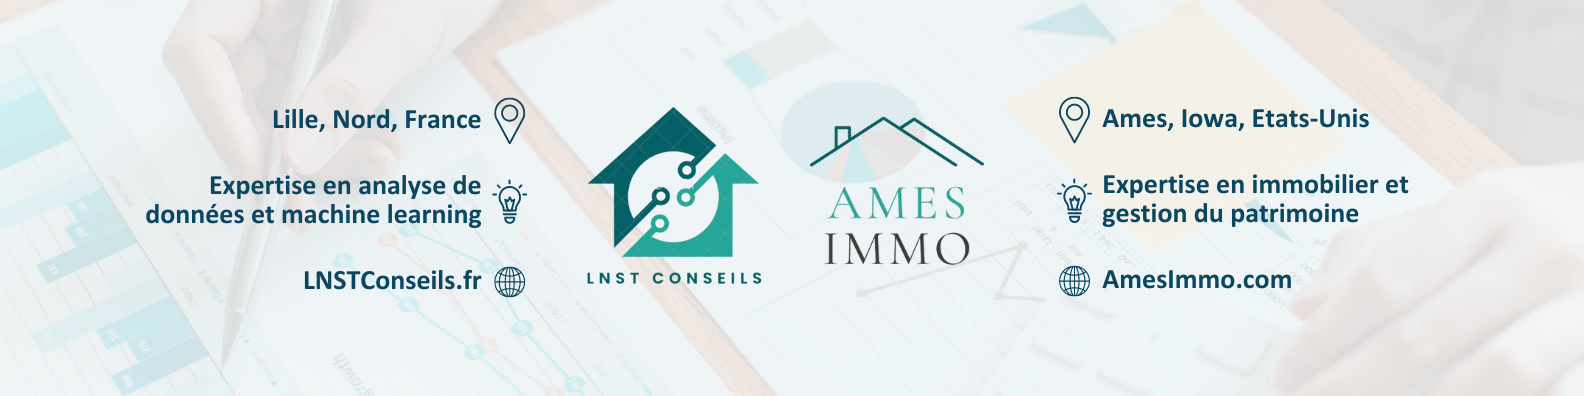

# Partie 2 - Corrélation entre les variables <a class="anchor"  id="correl"></a>
-----------------

In [ ]:
# Importation des bibliothèques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# Création du dataframe

data_etape6 = pd.read_csv('data_etape5.csv', sep = ',')
data_etape6.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,superficieTotale,mois_anneeVente,route_ville,autoroute,proximite_gare,proximite_parc,nbTotalSallesBain,noteGlobale,noteMoyenne,hauteurSs
0,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,500-1000 m2,0,...,200-300,2-2008,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
1,1000-1500 m2,0 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Bonne exposition,500-1000 m2,0,...,200-300,5-2007,Oui,Oui,Non,Non,2.5,14,7.0,Hauteur sous-sol 2.3 - 2.5 m
2,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Exposition minimale,< 500 m2,0,...,200-300,9-2008,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
3,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,< 500 m2,0,...,200-300,2-2006,Oui,Non,Non,Non,2.0,12,6.0,Hauteur sous-sol 2 - 2.2 m
4,1000-1500 m2,1001-1500 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,4,Unifamilial,Condition Ss Bonne,Exposition moyenne,500-1000 m2,0,...,300-400,12-2008,Oui,Non,Non,Non,3.5,13,6.5,Hauteur sous-sol 2.3 - 2.5 m


In [ ]:
data_etape6.shape

(2903, 106)

In [ ]:
# Séparation des données en train et test basées sur la colonne 'prix'
df_train = data_etape6.dropna(subset=['prix'])  # Supprime les lignes où la colonne 'prix' est vide/null
df_test = data_etape6[data_etape6['prix'].isnull()]     # Sélectionne les lignes où la colonne 'prix' est vide/null

# Supprime la colonne 'prix' de df_test car elle n'est pas nécessaire
df_test = df_test.drop(columns=['prix'])

# Maintenant, df_train contient les lignes avec la colonne 'prix' non vide
# et df_test contient les lignes avec la colonne 'prix' vide/null

# Vérifier les résultats
print("Ensemble de données d'entraînement :")
print(df_train.head())
print("\nEnsemble de données de test :")
print(df_test.head())

Ensemble de données d'entraînement :
  superficieEtage1 superficieEtage2 superficieRallonge3Saisons  \
0      500-1000 m2      501-1000 m2  Pas de rallonge 3 saisons   
1     1000-1500 m2             0 m2  Pas de rallonge 3 saisons   
2      500-1000 m2      501-1000 m2  Pas de rallonge 3 saisons   
3      500-1000 m2      501-1000 m2  Pas de rallonge 3 saisons   
4     1000-1500 m2     1001-1500 m2  Pas de rallonge 3 saisons   

          typeAlleeAcces  nbChambres typeBatiment    conditionSousSol  \
0  Pas d'accès à l'allée           3  Unifamilial  Condition Ss Bonne   
1  Pas d'accès à l'allée           3  Unifamilial  Condition Ss Bonne   
2  Pas d'accès à l'allée           3  Unifamilial  Condition Ss Bonne   
3  Pas d'accès à l'allée           3  Unifamilial  Condition Ss Bonne   
4  Pas d'accès à l'allée           4  Unifamilial  Condition Ss Bonne   

     expositionSousSol superficieFinieSousSol1 superficieFinieSousSol2  ...  \
0    Aucune exposition             500-1000 m2  

In [ ]:
df_train.shape

(1444, 106)

In [ ]:
df_test.shape

(1459, 105)

In [ ]:
#Le nombre de données manquantes
VM = df_train.isnull().sum()
VM2=VM[VM > 0]
VM2

Series([], dtype: int64)

In [ ]:
print(df_train.columns)

Index(['superficieEtage1', 'superficieEtage2', 'superficieRallonge3Saisons',
       'typeAlleeAcces', 'nbChambres', 'typeBatiment', 'conditionSousSol',
       'expositionSousSol', 'superficieFinieSousSol1',
       'superficieFinieSousSol2',
       ...
       'superficieTotale', 'mois_anneeVente', 'route_ville', 'autoroute',
       'proximite_gare', 'proximite_parc', 'nbTotalSallesBain', 'noteGlobale',
       'noteMoyenne', 'hauteurSs'],
      dtype='object', length=106)


In [ ]:
# Afficher toutes les colonnes du DataFrame
for col in df_train.columns:
    print(col)

superficieEtage1
superficieEtage2
superficieRallonge3Saisons
typeAlleeAcces
nbChambres
typeBatiment
conditionSousSol
expositionSousSol
superficieFinieSousSol1
superficieFinieSousSol2
qualiteSurfaceFinieSousSol1
qualiteSurfaceFinieSousSol2
nbSallesBainSs
nbDemiSallesBainSs
superficieSousSolNonAmenagee
climatisation
proxRoute1
proxRoute2
systElectrique
superficiePorcheFerme
conditionExterieur
qualiteExterieur
materiauExterieur1
materiauExterieur2
cloture
qualiteCheminee
nbCheminees
fondation
nbSallesBain
fonctionnalites
superficieGarage
nbPlacesVoiture
conditionGarage
interieurGarage
qualiteGarage
typeGarage
anneeConstrGarage
superficieHabitableSaufSs
nbDemiSallesBain
chauffage
qualiteChauffage
styleBatiment
id
nbCuisines
qualiteCuisine
contourTerrain
penteTerrain
superficieTerrain
configTerrain
longTerrainRue
formeTerrain
superficieQualiteInferieure
typeClasseBatiment
zonage
superficiePlacageMaconnerie
typePlacageMaconnerie
elementsDivers
valeursElementsDivers
moisVente
quartier
superfi


### Supression des variables non intéressantes pour la modélisation <a class="anchor"  id="suppression"></a>

In [ ]:
print(f"Nombre de colonne avant suppression:  {data_etape6.shape[1]}" )

Col_suppression = ['id', 'Latitude', 'Longitude', 'Coordonnées',
                   'mois_anneeVente','annee_indice_prix_logements', 'annee_taux_criminalite',
                   'changement_annuel_taux_inflation', 'date_taux_inflation',
                   'date_taux_criminalite', 'annee_taux_inflation',
                   'ancienneteConstruction', 'ancienneteRenovation']

data_etape6.drop(labels=Col_suppression, axis = 1, inplace = True)

print(f"Nombre de colonne après suppression:  {data_etape6.shape[1]}" )

Nombre de colonne avant suppression:  106
Nombre de colonne après suppression:  93


In [ ]:
data_etape6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 93 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   superficieEtage1               2903 non-null   object 
 1   superficieEtage2               2903 non-null   object 
 2   superficieRallonge3Saisons     2903 non-null   object 
 3   typeAlleeAcces                 2903 non-null   object 
 4   nbChambres                     2903 non-null   int64  
 5   typeBatiment                   2903 non-null   object 
 6   conditionSousSol               2903 non-null   object 
 7   expositionSousSol              2903 non-null   object 
 8   superficieFinieSousSol1        2903 non-null   object 
 9   superficieFinieSousSol2        2903 non-null   object 
 10  qualiteSurfaceFinieSousSol1    2903 non-null   object 
 11  qualiteSurfaceFinieSousSol2    2903 non-null   object 
 12  nbSallesBainSs                 2903 non-null   f

In [ ]:
cat_columns = data_etape6.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

['superficieEtage1', 'superficieEtage2', 'superficieRallonge3Saisons', 'typeAlleeAcces', 'typeBatiment', 'conditionSousSol', 'expositionSousSol', 'superficieFinieSousSol1', 'superficieFinieSousSol2', 'qualiteSurfaceFinieSousSol1', 'qualiteSurfaceFinieSousSol2', 'superficieSousSolNonAmenagee', 'climatisation', 'proxRoute1', 'proxRoute2', 'systElectrique', 'superficiePorcheFerme', 'conditionExterieur', 'qualiteExterieur', 'materiauExterieur1', 'materiauExterieur2', 'cloture', 'qualiteCheminee', 'fondation', 'fonctionnalites', 'superficieGarage', 'conditionGarage', 'interieurGarage', 'qualiteGarage', 'typeGarage', 'anneeConstrGarage', 'superficieHabitableSaufSs', 'chauffage', 'qualiteChauffage', 'styleBatiment', 'qualiteCuisine', 'contourTerrain', 'penteTerrain', 'superficieTerrain', 'configTerrain', 'longTerrainRue', 'formeTerrain', 'superficieQualiteInferieure', 'typeClasseBatiment', 'zonage', 'superficiePlacageMaconnerie', 'typePlacageMaconnerie', 'elementsDivers', 'valeursElementsDive

In [ ]:
# Fonction pour calculer le coefficient de V de Cramer
def cramers_v(x, y):
    # Convertir x et y en séries unidimensionnelles
    x = x.squeeze()
    y = y.squeeze()
    # Calculer la matrice de confusion
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Sélectionner uniquement les colonnes catégorielles et la variable cible 'prix'
categorical_vars = ['typeClasseBatiment', 'zonage', 'typeRouteAcces', 'typeAlleeAcces',
                    'formeTerrain', 'contourTerrain', 'utilites', 'configTerrain',
                    'penteTerrain', 'quartier', 'proxRoute1', 'proxRoute2', 'typeBatiment',
                    'styleBatiment', 'styleToit', 'materiauToit', 'materiauExterieur1',
                    'materiauExterieur2', 'typePlacageMaconnerie', 'qualiteExterieur',
                    'conditionExterieur', 'fondation', 'conditionSousSol', 'expositionSousSol',
                    'qualiteSurfaceFinieSousSol1', 'qualiteSurfaceFinieSousSol2', 'chauffage',
                    'qualiteChauffage', 'climatisation', 'systElectrique', 'qualiteCuisine',
                    'fonctionnalites', 'qualiteCheminee', 'typeGarage', 'interieurGarage',
                    'qualiteGarage', 'conditionGarage', 'alleePavee', 'qualitePiscine',
                    'cloture', 'elementsDivers', 'typeVente', 'conditionVente', 'route_ville',
                    'autoroute', 'proximite_gare', 'proximite_parc', 'hauteurSs']


df_cat = df_train[categorical_vars + ['prix']]

# Calculer la matrice de corrélation
corr_matrix_cat = pd.DataFrame(index=df_cat.columns, columns=df_cat.columns)
for i in df_cat.columns:
    for j in df_cat.columns:
        if i != j:
            # Extraire les valeurs des colonnes i et j et les convertir en séries unidimensionnelles
            values_i = df_cat[i]
            values_j = df_cat[j]
            # Calculer le coefficient de V de Cramer
            corr_matrix_cat.loc[i, j] = cramers_v(values_i, values_j)
        else:
            corr_matrix_cat.loc[i, j] = 1.0  # Mettre 1.0 sur la diagonale pour la corrélation parfaite avec elle-même

# Afficher la matrice de corrélation
corr_matrix_cat

,typeClasseBatiment,zonage,typeRouteAcces,typeAlleeAcces,formeTerrain,contourTerrain,utilites,configTerrain,penteTerrain,quartier,...,cloture,elementsDivers,typeVente,conditionVente,route_ville,autoroute,proximite_gare,proximite_parc,hauteurSs,prix
typeClasseBatiment,1.0,0.274602,0.0,0.206246,0.185805,0.104416,0.0,0.0654,0.025208,0.385541,...,0.081211,0.026213,0.140541,0.16374,0.107211,0.228922,0.0,0.054206,0.327892,0.16789
zonage,0.274602,1.0,0.0861,0.378789,0.266308,0.059772,0.0,0.087263,0.0,0.701881,...,0.041461,0.0,0.146563,0.145419,0.063236,0.114907,0.0,0.046924,0.20806,0.318002
typeRouteAcces,0.0,0.0861,1.0,0.0,0.0,0.095963,0.0,0.0,0.154804,0.0,...,0.0,0.110181,0.064572,0.094876,0.0,0.0,0.0,0.0,0.0,0.284119
typeAlleeAcces,0.206246,0.378789,0.0,1.0,0.110237,0.056881,0.0,0.042512,0.0,0.422203,...,0.0,0.0,0.040386,0.070621,0.0,0.092236,0.030451,0.0,0.130185,0.0
formeTerrain,0.185805,0.266308,0.0,0.110237,1.0,0.127546,0.0,0.353794,0.090918,0.292162,...,0.051851,0.041061,0.0,0.031429,0.059781,0.056928,0.077264,0.029854,0.225874,0.298551
contourTerrain,0.104416,0.059772,0.095963,0.056881,0.127546,1.0,0.0,0.048916,0.433081,0.194176,...,0.021736,0.0,0.0,0.074511,0.038516,0.039784,0.0,0.0,0.026751,0.0
utilites,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.092074,0.0,0.0,...,0.0,0.0,0.143228,0.08091,0.0,0.0,0.0,0.0,0.0,0.0
configTerrain,0.0654,0.087263,0.0,0.042512,0.353794,0.048916,0.092074,1.0,0.05775,0.080845,...,0.024223,0.0,0.0,0.041015,0.030418,0.141212,0.072556,0.036563,0.067827,0.137937
penteTerrain,0.025208,0.0,0.154804,0.0,0.090918,0.433081,0.0,0.05775,1.0,0.10386,...,0.0,0.0,0.021697,0.054112,0.0,0.0,0.0,0.0,0.0,0.0
quartier,0.385541,0.701881,0.0,0.422203,0.292162,0.194176,0.0,0.080845,0.10386,1.0,...,0.153033,0.044735,0.251684,0.222344,0.067909,0.247259,0.182159,0.207639,0.414096,0.190207


### ANOVA <a class="anchor"  id="ANOVA"></a>

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
📚 <strong> Définition </strong>

L’**ANOVA**, ou l'Analyse de la variance est une technique statistique utilisée afin d’**examiner l'influence de plusieures variables catégorielles sur une variable numérique**. Le test évalue si la variation entre les moyennes des groupes est statistiquement significative, c'est-à-dire si elle ne peut pas simplement être due au hasard. Si la p-valeur associée au test est inférieure au seuil de significativité de 0.05, l'hypothèse nulle est rejetée en faveur de l'hypothèse alternative, indiquant qu'il y a des différences significatives entre au moins deux des moyennes de groupe.
<br><br/>


En d'autres termes, l’ANOVA nous permet de comprendre si la variable explicative influence la variable cible et comment. Si la p-valeur est faible, nous avons des preuves statistiques pour suggérer que les moyennes des groupes sont différentes, et nous pouvons conclure que les variables catégorielles ont une certaine influence sur la variable continue *Y*, 'SalePrice'.

<br>

<div style="text-align:center;">
    <strong>Hypothèse Nulle H0 :</strong> Les moyennes des groupes définis par les différentes catégories de X sont égales. En d'autres mots, il n'y a aucune différence significative dans les moyennes des groupes.
</div>

<br>

<div style="text-align:center;">
    <strong>Hypothèse Alternative H1 :</strong> Au moins une paire de moyennes des groupes définis par les différentes catégories de X est significativement différente. Il existe donc une différence significative dans au moins une paire de moyennes des groupes.
</div>
<br><br/>

L'acceptation ou le rejet de l'hypothèse nulle (H0) dans le contexte de l'ANOVA est crucial pour la sélection des variables pertinentes dans notre modèle. Lorsque l'hypothèse nulle est rejetée pour une variable spécifique, cela signifie qu'au moins une paire de moyennes des groupes définis par les différentes catégories de cette variable est significativement différente. Ainsi, **les variables pour lesquelles l'hypothèse nulle est rejetée, telles que le type de classe de bâtiment et le zonage dans notre analyse, sont susceptibles d'avoir un impact significatif sur les prix des biens immobiliers**. Par conséquent, ces variables sont candidates à être incluses dans notre modèle de prédiction des prix.
<br><br/>

D'autre part, lorsque l'hypothèse nulle n'est pas rejetée pour une variable donnée, cela signifie qu'il n'y a pas suffisamment de preuves pour affirmer qu'il existe une différence significative dans les moyennes des groupes définis par les différentes catégories de cette variable. Par exemple, le contour du terrain et le type d'utilités dans notre analyse ne montrent pas de différence significative dans les prix des biens immobiliers entre leurs différentes catégories. Par conséquent, **ces variables peuvent être considérées comme moins pertinentes pour notre modèle de prédiction des prix** et peuvent être exclues de l'analyse ultérieure pour simplifier le modèle et améliorer son interprétabilité.

</div>

In [ ]:
cat_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_columns)

['superficieEtage1', 'superficieEtage2', 'superficieRallonge3Saisons', 'typeAlleeAcces', 'typeBatiment', 'conditionSousSol', 'expositionSousSol', 'superficieFinieSousSol1', 'superficieFinieSousSol2', 'qualiteSurfaceFinieSousSol1', 'qualiteSurfaceFinieSousSol2', 'superficieSousSolNonAmenagee', 'climatisation', 'proxRoute1', 'proxRoute2', 'systElectrique', 'superficiePorcheFerme', 'conditionExterieur', 'qualiteExterieur', 'materiauExterieur1', 'materiauExterieur2', 'cloture', 'qualiteCheminee', 'fondation', 'fonctionnalites', 'superficieGarage', 'conditionGarage', 'interieurGarage', 'qualiteGarage', 'typeGarage', 'anneeConstrGarage', 'superficieHabitableSaufSs', 'chauffage', 'qualiteChauffage', 'styleBatiment', 'qualiteCuisine', 'contourTerrain', 'penteTerrain', 'superficieTerrain', 'configTerrain', 'longTerrainRue', 'formeTerrain', 'superficieQualiteInferieure', 'typeClasseBatiment', 'zonage', 'superficiePlacageMaconnerie', 'typePlacageMaconnerie', 'elementsDivers', 'valeursElementsDive

In [ ]:
from scipy.stats import f_oneway

# Liste des variables catégorielles
variables_catégorielles = ['typeClasseBatiment', 'zonage', 'typeRouteAcces', 'typeAlleeAcces',
                           'formeTerrain', 'contourTerrain', 'utilites', 'configTerrain', 'penteTerrain',
                           'quartier', 'proxRoute1', 'proxRoute2', 'typeBatiment', 'styleBatiment',
                           'styleToit', 'materiauToit', 'materiauExterieur1', 'materiauExterieur2',
                           'typePlacageMaconnerie', 'qualiteExterieur', 'conditionExterieur',
                           'fondation', 'conditionSousSol', 'expositionSousSol', 'qualiteSurfaceFinieSousSol1',
                           'qualiteSurfaceFinieSousSol2', 'chauffage', 'qualiteChauffage', 'climatisation',
                           'systElectrique', 'qualiteCuisine', 'fonctionnalites', 'qualiteCheminee',
                           'typeGarage', 'interieurGarage', 'qualiteGarage', 'conditionGarage', 'alleePavee',
                           'qualitePiscine', 'cloture', 'elementsDivers', 'typeVente', 'conditionVente',
                           'route_ville', 'autoroute', 'proximite_gare', 'proximite_parc', 'hauteurSs']

resultats_anova = {}

for var in variables_catégorielles:
    groupes_catégorie = [df_train['prix'][df_train[var] == catégorie] for catégorie in df_train[var].unique()]
    statistique, p_valeur = f_oneway(*groupes_catégorie)
    resultats_anova[var] = {'Statistique ANOVA F': statistique, 'Valeur P': p_valeur}

resultats_anova_df = pd.DataFrame(resultats_anova).T

# Niveau de significativité
alpha = 0.05
resultats_anova_df['Signification'] = resultats_anova_df['Valeur P'].apply(lambda p: 'Rejeter' if p < alpha else 'Ne pas rejeter')
print(resultats_anova_df)

                             Statistique ANOVA F       Valeur P  \
typeClasseBatiment                    114.359006   7.998741e-47   
zonage                                 80.036903   1.094003e-33   
typeRouteAcces                          4.483368   3.439700e-02   
typeAlleeAcces                         16.636005   7.198180e-08   
formeTerrain                          108.968389   1.214420e-24   
contourTerrain                          0.821419   4.400129e-01   
utilites                                0.318766   5.724378e-01   
configTerrain                           7.210409   8.376341e-05   
penteTerrain                            1.388486   2.497861e-01   
quartier                               73.785270  4.904471e-112   
proxRoute1                             16.535410   1.447444e-10   
proxRoute2                              6.705229   1.710917e-04   
typeBatiment                           21.962450   4.020809e-10   
styleBatiment                          32.175609   1.026129e-2

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
⚙️ <strong> Interprétation </strong>

En examinant les résultats de l'ANOVA pour les différentes variables catégorielles, nous pouvons tirer plusieurs observations significatives. En général, lorsque la valeur p est inférieure à 0.05, nous rejetons l'hypothèse nulle, ce qui suggère que les moyennes des groupes sont statistiquement différentes. Prenons les exemples de deux variables : `zonage` et `utilites`.
<br><br/>

- **Zonage** :
  - **Statistique ANOVA F** : 80.04
  - **Valeur P** : 1.094003e-3
  - **Signification** : Rejeter
  - **Interprétation** : La statistique ANOVA F est élevée et la valeur p est très proche de zéro, ce qui suggère que les moyennes des groupes définis par les différentes zones sont statistiquement différentes. Par conséquent, nous rejetons l'hypothèse nulle. Cela indique que **le zonage a un impact significatif sur les prix des biens immobiliers**.


- **Utilites** :
  - **Statistique ANOVA F** : 0.318
  - **Valeur P** : 0.572438
  - **Signification** : Ne pas rejeter
  - **Interprétation** : La statistique ANOVA F est faible et la valeur p est supérieure à 0.05, ce qui indique qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle. Cela suggère que les moyennes des groupes définis par les différents types d'utilités ne sont pas statistiquement différentes. Par conséquent, **nous ne pouvons pas conclure que le type d'utilité a un impact significatif sur les prix des biens immobiliers** en fonction de ces résultats d'ANOVA.
<br><br/>

Les résultats indiquent que ces variables catégorielles spécifiques ont un impact significatif sur les prix des biens immobiliers, car les différences entre les moyennes des groupes sont statistiquement importantes, sauf pour les variables `utilites`, `contourTerrain`, `penteTerrain`, `qualitePiscine`, `route_ville` et `proximite_gare`. Par conséquent, nous envisageons de supprimer ces variables de notre étude, car elles ne semblent pas contribuer de manière significative à la variation des prix des biens immobiliers. Cependant, avant de prendre cette décision définitive, d'autres facteurs sont à prendre en compte, tels que la pertinence conceptuelle, le contexte et la logique métier pour éviter de baser exclusivement notre décision sur des critères statistiques.

</div>

In [ ]:
data_etape6.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,moyenne_indice_prix_logements,superficieTotale,route_ville,autoroute,proximite_gare,proximite_parc,nbTotalSallesBain,noteGlobale,noteMoyenne,hauteurSs
0,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,500-1000 m2,0,...,167.5975,200-300,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
1,1000-1500 m2,0 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Bonne exposition,500-1000 m2,0,...,167.6625,200-300,Oui,Oui,Non,Non,2.5,14,7.0,Hauteur sous-sol 2.3 - 2.5 m
2,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Exposition minimale,< 500 m2,0,...,167.5975,200-300,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
3,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,< 500 m2,0,...,163.4250,200-300,Oui,Non,Non,Non,2.0,12,6.0,Hauteur sous-sol 2 - 2.2 m
4,1000-1500 m2,1001-1500 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,4,Unifamilial,Condition Ss Bonne,Exposition moyenne,500-1000 m2,0,...,167.5975,300-400,Oui,Non,Non,Non,3.5,13,6.5,Hauteur sous-sol 2.3 - 2.5 m


In [ ]:
unique_values = data_etape6['typeRouteAcces'].unique()
observations_count = data_etape6['typeRouteAcces'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Pave' 'Gravier']

Nombre observations : Pave       2892
Gravier      11
Name: typeRouteAcces, dtype: int64


In [ ]:
unique_values = data_etape6['contourTerrain'].unique()
observations_count = data_etape6['contourTerrain'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Plat' 'En pente' 'Dépression']

Nombre observations : Plat          2613
En pente       233
Dépression      57
Name: contourTerrain, dtype: int64


In [ ]:
unique_values = data_etape6['utilites'].unique()
observations_count = data_etape6['utilites'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Électricité, Gaz, Eau et Egout' 'Électricité et Gaz Seulement']

Nombre observations : Électricité, Gaz, Eau et Egout    2900
Électricité et Gaz Seulement         3
Name: utilites, dtype: int64


En examinant de plus près cette variable, nous avons remarqué que bien qu'elle comporte deux modalités, la deuxième modalité ne caractérise qu'une seule observation. Par conséquent, nous avons décidé de supprimer cette variable de notre étude.

In [ ]:
unique_values = data_etape6['penteTerrain'].unique()
observations_count = data_etape6['penteTerrain'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Pente Douce' 'Pente Modérée' 'Pente Raide']

Nombre observations : Pente Douce      2767
Pente Modérée     124
Pente Raide        12
Name: penteTerrain, dtype: int64


In [ ]:
unique_values = data_etape6['proxRoute2'].unique()
observations_count = data_etape6['proxRoute2'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Route ville' 'Autoroute' 'Priximité gare' 'Proximité parc']

Nombre observations : Route ville       2874
Autoroute           18
Proximité parc       7
Priximité gare       4
Name: proxRoute2, dtype: int64


In [ ]:
unique_values = data_etape6['qualiteSurfaceFinieSousSol2'].unique()
observations_count = data_etape6['qualiteSurfaceFinieSousSol2'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Non fini' 'Quartiers de vie sous la moyenne' 'Aucun sous-sol'
 'Quartiers de vie moyenne' 'Salle de récréation moyenne' 'Faible qualité'
 'Bonne qualité de vie']

Nombre observations : Non fini                            2480
Salle de récréation moyenne          104
Faible qualité                        87
Aucun sous-sol                        80
Quartiers de vie sous la moyenne      67
Quartiers de vie moyenne              51
Bonne qualité de vie                  34
Name: qualiteSurfaceFinieSousSol2, dtype: int64


In [ ]:
unique_values = data_etape6['fonctionnalites'].unique()
observations_count = data_etape6['fonctionnalites'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Typique' 'Déductions mineures' 'Déductions majeures'
 'Déductions modérées' 'Dommages graves' 'Fonctionnalité inconnue']

Nombre observations : Typique                    2702
Déductions mineures         135
Déductions modérées          34
Déductions majeures          28
Dommages graves               2
Fonctionnalité inconnue       2
Name: fonctionnalites, dtype: int64


In [ ]:
unique_values = data_etape6['elementsDivers'].unique()
observations_count = data_etape6['elementsDivers'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Non défini' 'Remise' '2ème Garage' 'Autre' 'Court de tennis']

Nombre observations : Non défini         2800
Remise               93
2ème Garage           5
Autre                 4
Court de tennis       1
Name: elementsDivers, dtype: int64


In [ ]:
unique_values = data_etape6['qualitePiscine'].unique()
observations_count = data_etape6['qualitePiscine'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Non défini' 'Excellent' 'Médiocre' 'Bonne']

Nombre observations : Non défini    2895
Excellent        3
Bonne            3
Médiocre         2
Name: qualitePiscine, dtype: int64


In [ ]:
unique_values = data_etape6['superficieQualiteInferieure'].unique()
observations_count = data_etape6['superficieQualiteInferieure'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['0 m2' '301-400 m2' '> 500 m2' '201-300 m2' '101-200 m2' '401-500 m2'
 '1-100 m2']

Nombre observations : 0 m2          2863
301-400 m2       9
> 500 m2         8
401-500 m2       7
101-200 m2       6
201-300 m2       5
1-100 m2         5
Name: superficieQualiteInferieure, dtype: int64


In [ ]:
unique_values = data_etape6['superficieRallonge3Saisons'].unique()
observations_count = data_etape6['superficieRallonge3Saisons'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Pas de rallonge 3 saisons' '> 201 m2' '101-200 m2' '1-100 m2']

Nombre observations : Pas de rallonge 3 saisons    2866
101-200 m2                     19
> 201 m2                       15
1-100 m2                        3
Name: superficieRallonge3Saisons, dtype: int64


In [ ]:
unique_values = data_etape6['superficiePiscine'].unique()
observations_count = data_etape6['superficiePiscine'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Pas de piscine' '401-600 m2' '> 600 m2' '1-200 m2' '201-400 m2']

Nombre observations : Pas de piscine    2892
401-600 m2           5
> 600 m2             3
201-400 m2           2
1-200 m2             1
Name: superficiePiscine, dtype: int64


In [ ]:
unique_values = data_etape6['route_ville'].unique()
observations_count = data_etape6['route_ville'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Oui' 'Non']

Nombre observations : Oui    2874
Non      29
Name: route_ville, dtype: int64


In [ ]:
unique_values = data_etape6['proximite_gare'].unique()
observations_count = data_etape6['proximite_gare'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Non' 'Oui']

Nombre observations : Non    2806
Oui      97
Name: proximite_gare, dtype: int64



<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px;">
💡 <strong> Observation </strong>

Nous décidons de conserver la variable "date_taux_criminalite" dans notre étude car nous croyons qu'elle pourrait influencer le prix de l'immobilier.
    
</div>

In [ ]:
print(f"Nombre de colonne avant suppression:  {data_etape6.shape[1]}" )

Col_suppression = ['utilites', 'contourTerrain', 'penteTerrain', 'qualitePiscine',
                   'superficieQualiteInferieure', 'fonctionnalites', 'qualiteSurfaceFinieSousSol2',
                   'superficieRallonge3Saisons', 'superficiePiscine', 'route_ville', 'typeRouteAcces', 'proxRoute2']

data_etape6.drop(labels=Col_suppression, axis = 1, inplace = True)

print(f"Nombre de colonne après suppression:  {data_etape6.shape[1]}" )

Nombre de colonne avant suppression:  93
Nombre de colonne après suppression:  81


In [ ]:
data_etape6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   superficieEtage1               2903 non-null   object 
 1   superficieEtage2               2903 non-null   object 
 2   typeAlleeAcces                 2903 non-null   object 
 3   nbChambres                     2903 non-null   int64  
 4   typeBatiment                   2903 non-null   object 
 5   conditionSousSol               2903 non-null   object 
 6   expositionSousSol              2903 non-null   object 
 7   superficieFinieSousSol1        2903 non-null   object 
 8   superficieFinieSousSol2        2903 non-null   object 
 9   qualiteSurfaceFinieSousSol1    2903 non-null   object 
 10  nbSallesBainSs                 2903 non-null   float64
 11  nbDemiSallesBainSs             2903 non-null   float64
 12  superficieSousSolNonAmenagee   2903 non-null   o


### Matrice de corrélation <a class="anchor"  id="corrélation"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

Pour les variables numériques nous allons réaliser une matrice de corrélation, qui pourra nous fournir des indices importants sur la manière dont différentes caractéristiques influent sur le prix des propriétés, permettant ainsi d'affiner et d'améliorer les modèles de prédiction.
    
Si la corrélation entre la superficie de la maison et le prix de vente est élevée, cela suggère qu'une plus grande superficie est généralement associée à un prix de vente plus élevé. De même, une corrélation négative entre le nombre de chambres et le prix de vente pourrait indiquer que des maisons avec moins de chambres sont généralement vendues à des prix plus bas.

En utilisant ces informations, les modèles de prédiction des prix immobiliers peuvent être ajustés pour tenir compte de ces relations. Par exemple, un modèle pourrait donner plus de poids à la superficie lors de la prédiction des prix, en raison de sa forte corrélation positive avec le prix de vente.

</div>

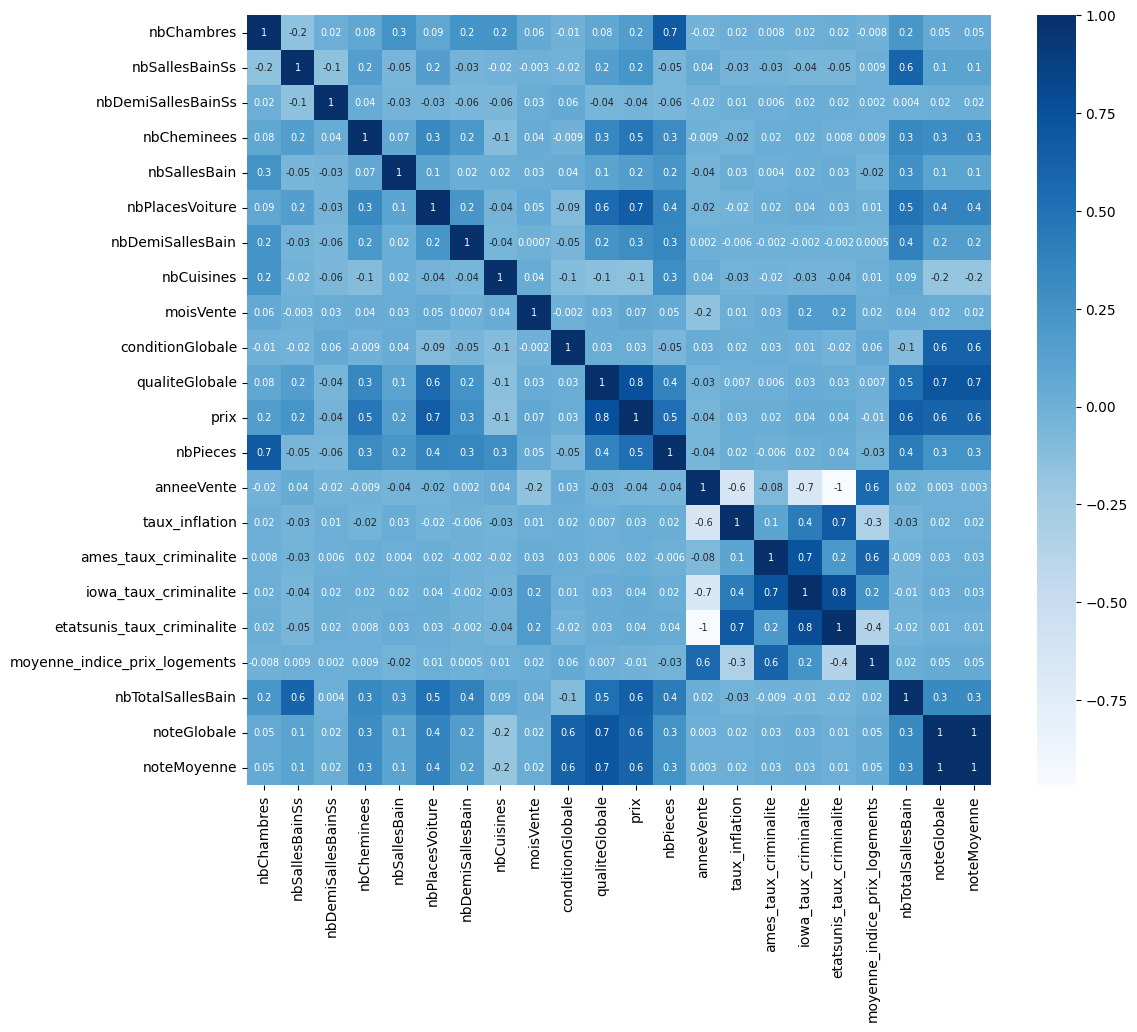

In [ ]:
num_col = data_etape6.select_dtypes(include=['int64', 'float64'])

cor = num_col.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data=cor, annot=True, cmap='Blues', fmt='.1g', annot_kws={"size": 7})
plt.show()

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
💡 <strong> Observation </strong>

**Seuils** :

- Après avoir défini nos seuils de corrélation, nous identifions les variables qui sont significativement corrélées avec notre variable cible, le "prix". Nous considérons comme variables **influençant notre variable cible `prix`** celles qui présentent une corrélation avec la cible égale ou supérieure à 0.3 (positivement corrélées) ou égale ou inférieure à -0.3 (négativement corrélées). Ces variables peuvent être importantes dans la modélisation du prix des biens immobiliers, car elles fournissent des indications sur les facteurs qui influent sur son évaluation.
<br><br/>
- Ensuite, nous examinons **les corrélations entre les variables explicatives**. Si deux variables explicatives présentent une corrélation élevée entre elles, c'est-à-dire une corrélation absolue de 0.6 à 1 ou de -0.6 à -1, cela indique une forte redondance dans les informations qu'elles fournissent. Dans ce cas, nous éliminons l'une des deux variables pour éviter la colinéarité, ce qui peut affecter négativement la performance de notre modèle.

</div>

In [ ]:
# Calculer la corrélation entre les variables et la variable cible 'prix'
correlation_prix = data_etape6.corr()['prix']

# Sélectionner les caractéristiques avec des valeurs de corrélation entre -0.3 et +0.3
selected_features = correlation_prix[(correlation_prix >= -0.3) & (correlation_prix <= 0.3)]

# Afficher les caractéristiques sélectionnées avec leurs valeurs de corrélation
print("Caractéristiques sélectionnées avec des valeurs de corrélation entre -0.3 et +0.3 :")
for variable, correlation in selected_features.items():
    print(f"Variable : {variable}, Corrélation avec 'prix' : {correlation}")

Caractéristiques sélectionnées avec des valeurs de corrélation entre -0.3 et +0.3 :
Variable : nbChambres, Corrélation avec 'prix' : 0.16404275007955135
Variable : nbSallesBainSs, Corrélation avec 'prix' : 0.23681497491476458
Variable : nbDemiSallesBainSs, Corrélation avec 'prix' : -0.03585527481737946
Variable : nbSallesBain, Corrélation avec 'prix' : 0.16986856210192666
Variable : nbDemiSallesBain, Corrélation avec 'prix' : 0.2877126295923791
Variable : nbCuisines, Corrélation avec 'prix' : -0.1428484189096525
Variable : moisVente, Corrélation avec 'prix' : 0.07469056164377143
Variable : conditionGlobale, Corrélation avec 'prix' : 0.03062455765701667
Variable : anneeVente, Corrélation avec 'prix' : -0.0400938404552079
Variable : taux_inflation, Corrélation avec 'prix' : 0.027965681577725245
Variable : ames_taux_criminalite, Corrélation avec 'prix' : 0.022666866483357185
Variable : iowa_taux_criminalite, Corrélation avec 'prix' : 0.03968109557038365
Variable : etatsunis_taux_criminali

<ipython-input-87-64328141311c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_prix = data_etape6.corr()['prix']


In [ ]:
print(num_col.columns.tolist())

['nbChambres', 'nbSallesBainSs', 'nbDemiSallesBainSs', 'nbCheminees', 'nbSallesBain', 'nbPlacesVoiture', 'nbDemiSallesBain', 'nbCuisines', 'moisVente', 'conditionGlobale', 'qualiteGlobale', 'prix', 'nbPieces', 'anneeVente', 'taux_inflation', 'ames_taux_criminalite', 'iowa_taux_criminalite', 'etatsunis_taux_criminalite', 'moyenne_indice_prix_logements', 'nbTotalSallesBain', 'noteGlobale', 'noteMoyenne']


In [ ]:
# Suppresion de variables en fonction de leur corrélation avec la variable cible
print(f"Nombre de colonne avant suppression:  {data_etape6.shape[1]}" )

Col_suppression = ['nbSallesBainSs', 'nbDemiSallesBainSs', 'nbSallesBain', 'nbDemiSallesBain',
                   'iowa_taux_criminalite', 'etatsunis_taux_criminalite']

data_etape6.drop(labels=Col_suppression, axis = 1, inplace = True)

print(f"Nombre de colonne après suppression:  {data_etape6.shape[1]}" )

Nombre de colonne avant suppression:  81
Nombre de colonne après suppression:  75


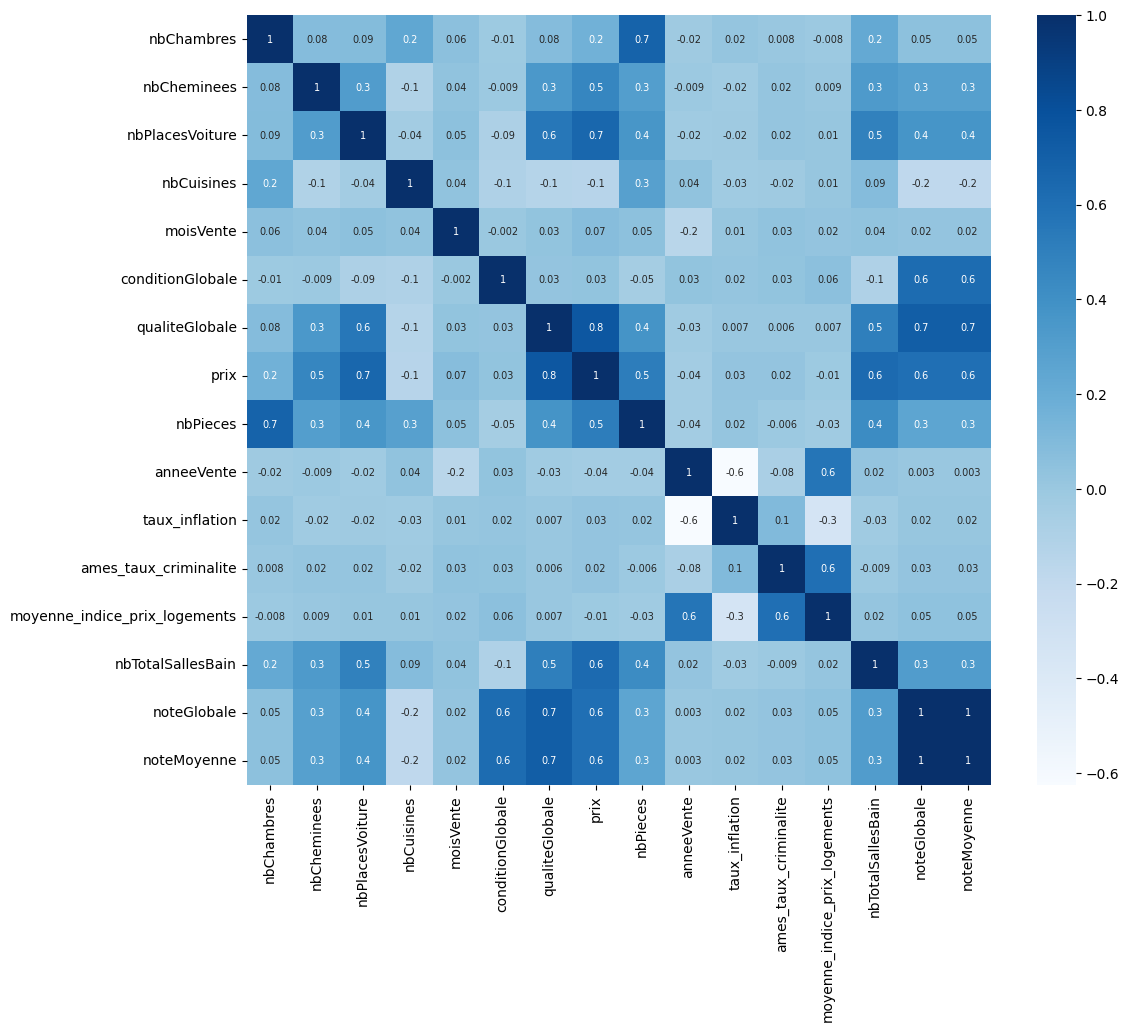

In [ ]:
num_col = data_etape6.select_dtypes(include=['int64', 'float64'])

cor = num_col.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data=cor, annot=True, cmap='Blues', fmt='.1g', annot_kws={"size": 7})
plt.show()

In [ ]:
# Calculer la corrélation entre les variables numériques
correlation_numerical = data_etape6.select_dtypes(include='number').corr()

# Créer un masque pour sélectionner les corrélations supérieures à 0.6 en valeur absolue
mask_high_correlation = abs(correlation_numerical) > 0.6

# Parcourir les corrélations pour trouver les paires corrélées
print("Paires de caractéristiques corrélées avec une corrélation absolue supérieure à 0.6 :")
for i in range(len(correlation_numerical.columns)):
    for j in range(i+1, len(correlation_numerical.columns)):
        if mask_high_correlation.iloc[i, j]:
            feature_i = correlation_numerical.columns[i]
            feature_j = correlation_numerical.columns[j]
            print(f"{feature_i} et {feature_j}")

Paires de caractéristiques corrélées avec une corrélation absolue supérieure à 0.6 :
nbChambres et nbPieces
nbPlacesVoiture et prix
conditionGlobale et noteGlobale
conditionGlobale et noteMoyenne
qualiteGlobale et prix
qualiteGlobale et noteGlobale
qualiteGlobale et noteMoyenne
prix et nbTotalSallesBain
prix et noteGlobale
prix et noteMoyenne
anneeVente et taux_inflation
ames_taux_criminalite et moyenne_indice_prix_logements
noteGlobale et noteMoyenne


In [ ]:
# Affichage des noms des colonnes
print(data_etape6.columns)

Index(['superficieEtage1', 'superficieEtage2', 'typeAlleeAcces', 'nbChambres',
       'typeBatiment', 'conditionSousSol', 'expositionSousSol',
       'superficieFinieSousSol1', 'superficieFinieSousSol2',
       'qualiteSurfaceFinieSousSol1', 'superficieSousSolNonAmenagee',
       'climatisation', 'proxRoute1', 'systElectrique',
       'superficiePorcheFerme', 'conditionExterieur', 'qualiteExterieur',
       'materiauExterieur1', 'materiauExterieur2', 'cloture',
       'qualiteCheminee', 'nbCheminees', 'fondation', 'superficieGarage',
       'nbPlacesVoiture', 'conditionGarage', 'interieurGarage',
       'qualiteGarage', 'typeGarage', 'anneeConstrGarage',
       'superficieHabitableSaufSs', 'chauffage', 'qualiteChauffage',
       'styleBatiment', 'nbCuisines', 'qualiteCuisine', 'superficieTerrain',
       'configTerrain', 'longTerrainRue', 'formeTerrain', 'typeClasseBatiment',
       'zonage', 'superficiePlacageMaconnerie', 'typePlacageMaconnerie',
       'elementsDivers', 'valeursEleme

In [ ]:
data_etape6.shape

(2903, 75)

In [ ]:
data_etape6.head()

,superficieEtage1,superficieEtage2,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,qualiteSurfaceFinieSousSol1,...,ames_taux_criminalite,moyenne_indice_prix_logements,superficieTotale,autoroute,proximite_gare,proximite_parc,nbTotalSallesBain,noteGlobale,noteMoyenne,hauteurSs
0,500-1000 m2,501-1000 m2,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,500-1000 m2,0,Bonne qualité de vie,...,313.1278,167.5975,200-300,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
1,1000-1500 m2,0 m2,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Bonne exposition,500-1000 m2,0,Quartiers de vie moyenne,...,387.4317,167.6625,200-300,Oui,Non,Non,2.5,14,7.0,Hauteur sous-sol 2.3 - 2.5 m
2,500-1000 m2,501-1000 m2,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Exposition minimale,< 500 m2,0,Bonne qualité de vie,...,313.1278,167.5975,200-300,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
3,500-1000 m2,501-1000 m2,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,< 500 m2,0,Quartiers de vie moyenne,...,279.7815,163.4250,200-300,Non,Non,Non,2.0,12,6.0,Hauteur sous-sol 2 - 2.2 m
4,1000-1500 m2,1001-1500 m2,Pas d'accès à l'allée,4,Unifamilial,Condition Ss Bonne,Exposition moyenne,500-1000 m2,0,Bonne qualité de vie,...,313.1278,167.5975,300-400,Non,Non,Non,3.5,13,6.5,Hauteur sous-sol 2.3 - 2.5 m


In [ ]:
data_etape6.to_csv('data_etape6.csv', index = False)

In [ ]:
data_etape6.shape

(2903, 75)

L'étude est maintenant terminée, nous espérons que vous êtes convaincu et pleinement (ou du moins presque) satisfait du résultat.😉